# Pre-Evaluation Questionnaire Analysis 

## 1. Load Data

In [11]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
file_path = "Pre-Evaluation (French)(1-31).xlsx"
df = pd.read_excel(file_path)

# Drop empty rows
df.dropna(how='all', inplace=True)



## 2. Clean and Prepare

In [12]:
# Drop irrelevant metadata columns without 'Startzeit' for time analysis
meta_cols = ['ID', 'E-Mail', 'Name', 'Zeitpunkt der letzten Änderung', 'Fertigstellungszeit']
df_clean = df.drop(columns=meta_cols, errors='ignore')

# make groups depending on Startzeit
df_clean['Startzeit'] = pd.to_datetime(df_clean['Startzeit'], errors='coerce')
df_clean['TimeGroup'] = df_clean['Startzeit'].dt.round('15min')

# Identify non-response columns to exclude from numeric conversion
non_response_cols = ['Startzeit', 'TimeGroup']
response_cols = df_clean.columns.difference(non_response_cols)

# numeric only
df_clean[response_cols] = df_clean[response_cols].apply(pd.to_numeric, errors='coerce')
df_clean = df_clean.dropna(thresh=5)


## 5. Distribution of General Questions

Experience Questions - Mean and Std Dev:
Have you ever worked with or cared for people with schizophrenia?: Mean = 4.03, Std = 1.40
Have you ever worked with or provided care to patients?: Mean = 4.97, Std = 0.19


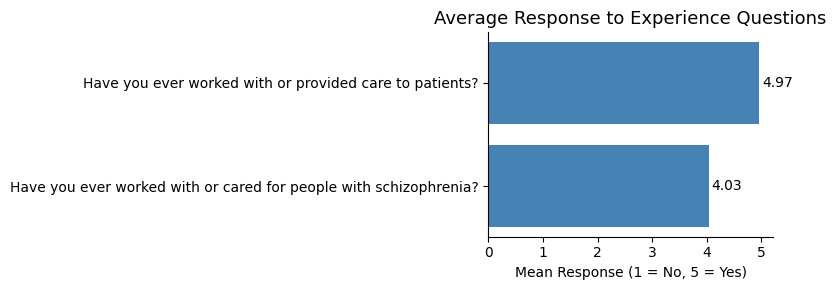

In [13]:

# Map French to English
question_map = {
    "Avez-vous déjà travaillé avec ou prodigué des soins à des patients ?":
        "Have you ever worked with or provided care to patients?",
    "Avez-vous déjà travaillé ou soigné des personnes atteintes de schizophrénie ?":
        "Have you ever worked with or cared for people with schizophrenia?"
}

df = df.rename(columns=question_map)
selected_questions = list(question_map.values())
df_selected = df[selected_questions].apply(pd.to_numeric, errors='coerce').dropna(how='all')

# Calculate mean responses
mean_scores = df_selected.mean().sort_values()

# Plot 
plt.figure(figsize=(8, 3))
bars = plt.barh(mean_scores.index, mean_scores.values, color='steelblue')

for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.05, bar.get_y() + bar.get_height() / 2,
             f"{width:.2f}", va='center', ha='left')

mean_scores = df_selected.mean().sort_values()
std_scores = df_selected.std()

print("Experience Questions - Mean and Std Dev:")
for question in mean_scores.index:
    print(f"{question}: Mean = {mean_scores[question]:.2f}, Std = {std_scores[question]:.2f}")

plt.title("Average Response to Experience Questions", fontsize=13)
plt.xlabel("Mean Response (1 = No, 5 = Yes)")
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.tight_layout()
plt.show()

## 6. Distribution of Jefferson Scale of Empathy

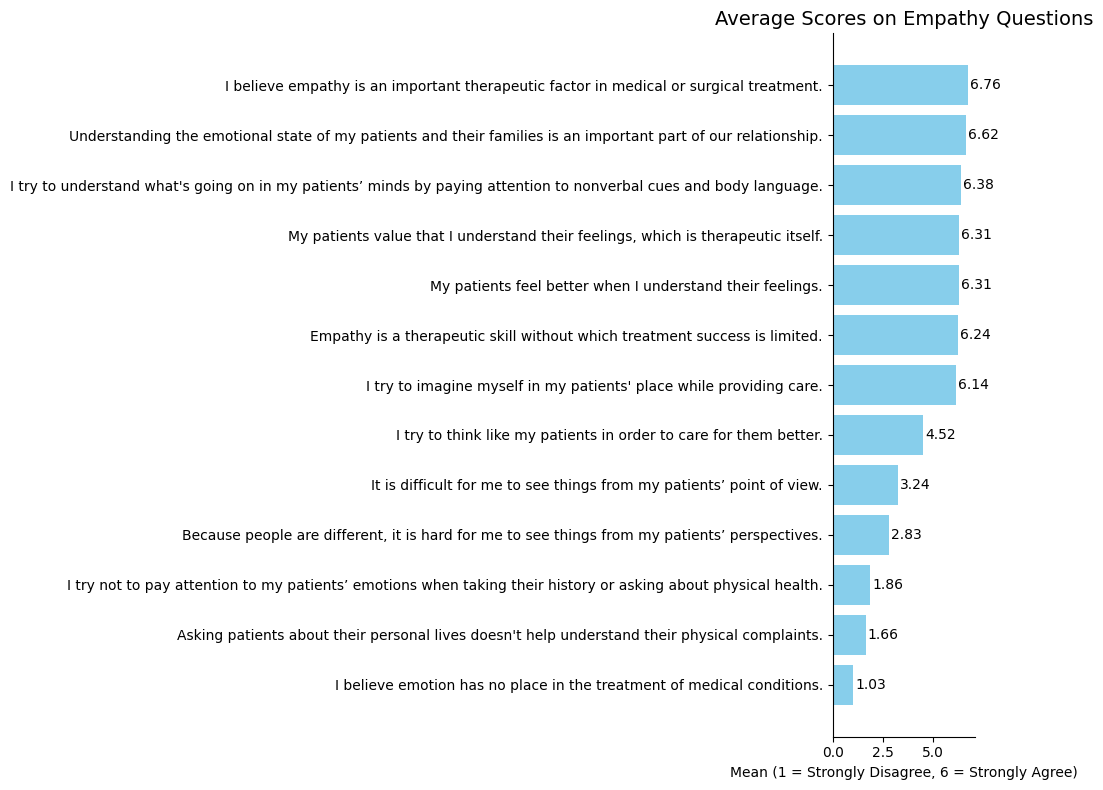

0     74.0
1     79.0
2     83.0
3     77.0
4     78.0
5     78.0
6     91.0
7     82.0
8     73.0
9     77.0
10    80.0
11    85.0
12    71.0
13    86.0
14    78.0
15    75.0
16    81.0
17    78.0
18    72.0
19    81.0
20    75.0
21    85.0
22    77.0
23    81.0
24    77.0
25    75.0
26    78.0
27    78.0
28    76.0
Name: Empathy Score, dtype: float64
Empathy Score Summary (based on 13 items, range: 13–91):
count    29.000000
mean     78.655172
std       4.442296
min      71.000000
25%      76.000000
50%      78.000000
75%      81.000000
max      91.000000
Name: Empathy Score, dtype: float64
Empathy Questions - Mean and Std Dev:
I believe emotion has no place in the treatment of medical conditions.: Mean = 1.03, Std = 0.19
Asking patients about their personal lives doesn't help understand their physical complaints.: Mean = 1.66, Std = 1.17
I try not to pay attention to my patients’ emotions when taking their history or asking about physical health.: Mean = 1.86, Std = 1.64
Because peo

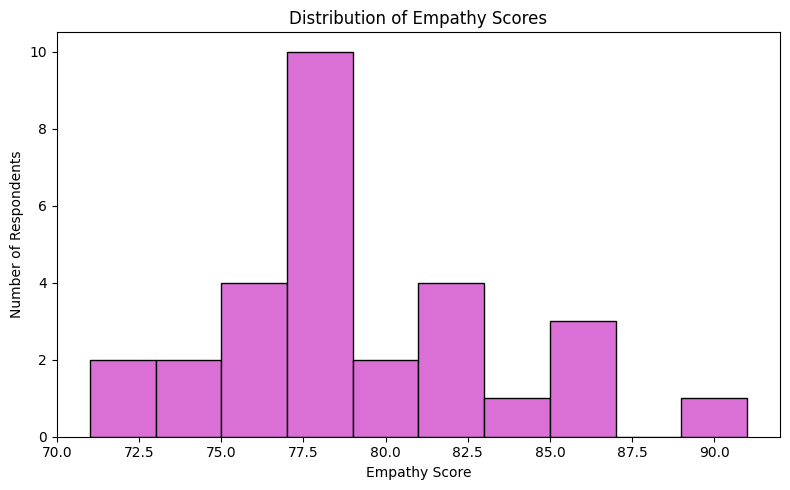

Overall Mean and Std Dev of Empathy Scores:
Mean: 78.63, Std Dev: 1.53
Per-Session Empathy Score Summary:
           Avg Empathy Score   Std Dev
TimeGroup                             
12:45              78.166667  2.926887
13:15              81.333333  6.282250
14:00              78.166667  5.115336
15:00              78.000000  5.099020
15:30              77.500000  2.073644

Overall Mean: 78.63
Overall Std Dev: 1.53


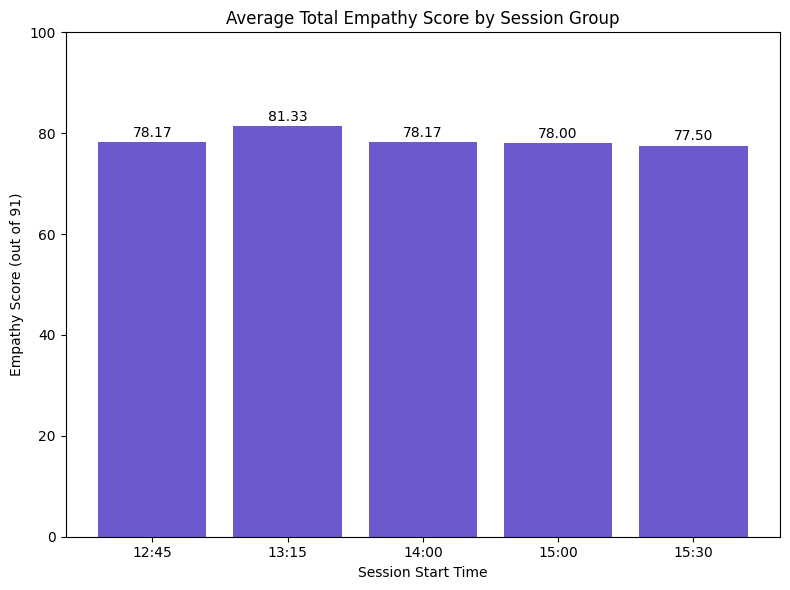

In [14]:
import pandas as pd
import matplotlib.pyplot as plt


# all questions
french_questions = [
    'Mes patients se sentent mieux lorsque je comprends leurs sentiments.',
    "Il m'est difficile d'envisager les choses du point de vue de mes patients.",
    "Parce que les gens sont différents, il m'est difficile de voir les choses du point de vue de mes patients.",
    "J'essaie de ne pas prêter attention aux émotions de mes patients lorsque je recueille leurs antécédents ou que je leur pose des questions sur leur santé physique.",
    "J'essaie de m'imaginer à la place de mes patients lorsque je leur prodigue des soins.",
    'Mes patients apprécient que je comprenne leurs sentiments, ce qui est thérapeutique en soi.',
    "Demander aux patients ce qui se passe dans leur vie personnelle n'aide pas à comprendre leurs plaintes physiques.",
    "J'essaie de comprendre ce qui se passe dans l'esprit de mes patients en prêtant attention à leurs signaux non verbaux et à leur langage corporel.",
    "Je pense que l'émotion n'a pas sa place dans le traitement des maladies médicales.",
    "L'empathie est une compétence thérapeutique sans laquelle le succès du traitement est limité.",
    'Un élément important de la relation avec mes patients est ma compréhension de leur état émotionnel et de celui de leur famille.',
    "J'essaie de penser comme mes patients afin de mieux les soigner.",
    "Je pense que l'empathie est un facteur thérapeutique important dans le cadre d'un traitement médical ou chirurgical."
]

english_questions = [
    "My patients feel better when I understand their feelings.",
    "It is difficult for me to see things from my patients’ point of view.",
    "Because people are different, it is hard for me to see things from my patients’ perspectives.",
    "I try not to pay attention to my patients’ emotions when taking their history or asking about physical health.",
    "I try to imagine myself in my patients' place while providing care.",
    "My patients value that I understand their feelings, which is therapeutic itself.",
    "Asking patients about their personal lives doesn't help understand their physical complaints.",
    "I try to understand what's going on in my patients’ minds by paying attention to nonverbal cues and body language.",
    "I believe emotion has no place in the treatment of medical conditions.",
    "Empathy is a therapeutic skill without which treatment success is limited.",
    "Understanding the emotional state of my patients and their families is an important part of our relationship.",
    "I try to think like my patients in order to care for them better.",
    "I believe empathy is an important therapeutic factor in medical or surgical treatment."
]

question_map = dict(zip(french_questions, english_questions))
df_renamed = df.rename(columns=question_map)

# Select and clean 
df_attitudes = df_renamed[english_questions].apply(pd.to_numeric, errors='coerce')
df_attitudes = df_attitudes.dropna(thresh=5)


# PLOT 1: Avg Scores
mean_scores = df_attitudes.mean().sort_values()
plt.figure(figsize=(10, 8))
bars = plt.barh(mean_scores.index, mean_scores.values, color='skyblue')

for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.1,
             bar.get_y() + bar.get_height() / 2,
             f"{width:.2f}",
             va='center', ha='left', fontsize=10)

plt.title("Average Scores on Empathy Questions", fontsize=14)
plt.xlabel("Mean (1 = Strongly Disagree, 6 = Strongly Agree)")
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.tight_layout()
plt.show()

# PLOT 2: Empathy Scores

# Reverse-score
def reverse_score(series):
    return series.map({1: 7, 2: 6, 3: 5, 4: 4, 5: 3, 6: 2, 7: 1})

# Questions to reverse
reverse_items = [
    "It is difficult for me to see things from my patients’ point of view.",
    "Because people are different, it is hard for me to see things from my patients’ perspectives.",
    "I try not to pay attention to my patients’ emotions when taking their history or asking about physical health.",
    "Asking patients about their personal lives doesn't help understand their physical complaints.",
    "I believe emotion has no place in the treatment of medical conditions."
]


df_empathy_scored = df_attitudes.copy()
for col in reverse_items:
    df_empathy_scored[col] = reverse_score(df_empathy_scored[col])

# Sum the empathy scores
df_empathy_scored["Empathy Score"] = df_empathy_scored.sum(axis=1)

print(df_empathy_scored["Empathy Score"].reset_index(drop=True))
print("Empathy Score Summary (based on 13 items, range: 13–91):")
print(df_empathy_scored["Empathy Score"].describe())

mean_scores = df_attitudes.mean().sort_values()
std_scores = df_attitudes.std()

print("Empathy Questions - Mean and Std Dev:")
for question in mean_scores.index:
    print(f"{question}: Mean = {mean_scores[question]:.2f}, Std = {std_scores[question]:.2f}")

# Plot 
plt.figure(figsize=(8, 5))
df_empathy_scored["Empathy Score"].plot(kind='hist', bins=10, color='orchid', edgecolor='black')
plt.title("Distribution of Empathy Scores")
plt.xlabel("Empathy Score")
plt.ylabel("Number of Respondents")
plt.tight_layout()
plt.show()


# PLOT3 : Empathy Score by Session Time
# New df
score_summary = []

for group_time, group_data in df_clean.groupby('TimeGroup'):
    df_group_temp = group_data.rename(columns=question_map)
    df_empathy_temp = df_group_temp[english_questions].apply(pd.to_numeric, errors='coerce')

    # Reverse 
    for col in reverse_items:
        if col in df_empathy_temp.columns:
            df_empathy_temp[col] = reverse_score(df_empathy_temp[col])

    df_empathy_temp["Empathy Score"] = df_empathy_temp.sum(axis=1)
    avg_score = df_empathy_temp["Empathy Score"].mean()
    std_score = df_empathy_temp["Empathy Score"].std()
    score_summary.append((group_time.strftime('%H:%M'), avg_score, std_score))

# Convert to df
score_df = pd.DataFrame(score_summary, columns=["TimeGroup", "Avg Empathy Score", "Std Dev"])
score_df.set_index("TimeGroup", inplace=True)
score_df.sort_index(inplace=True)

overall_mean = score_df["Avg Empathy Score"].mean()
overall_std = score_df["Avg Empathy Score"].std()
print("Overall Mean and Std Dev of Empathy Scores:")
print(f"Mean: {overall_mean:.2f}, Std Dev: {overall_std:.2f}")
print("Per-Session Empathy Score Summary:")
print(score_df)
print(f"\nOverall Mean: {overall_mean:.2f}")
print(f"Overall Std Dev: {overall_std:.2f}")

# Plot 
plt.figure(figsize=(8, 6))
bars = plt.bar(score_df.index, score_df["Avg Empathy Score"], color='slateblue')

for bar, std in zip(bars, score_df["Std Dev"]):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.5,
             f"{height:.2f}", ha='center', va='bottom')

plt.title("Average Total Empathy Score by Session Group")
plt.ylabel("Empathy Score (out of 91)")
plt.xlabel("Session Start Time")
plt.ylim(0, 100)
plt.tight_layout()
plt.show()



## 7. Distribution of Perception

Emotional States - Mean and Std Dev:
Ashamed: Mean = 1.24, Std = 0.58
Irritated: Mean = 1.76, Std = 1.12
Inspired: Mean = 2.21, Std = 1.08
Enthusiastic: Mean = 2.38, Std = 1.01
Distressed: Mean = 2.62, Std = 1.01
Fearful: Mean = 2.90, Std = 0.98
Nervous: Mean = 2.93, Std = 1.22
Interested: Mean = 3.86, Std = 1.16
Alert: Mean = 3.93, Std = 0.96
Attentive: Mean = 4.24, Std = 0.74


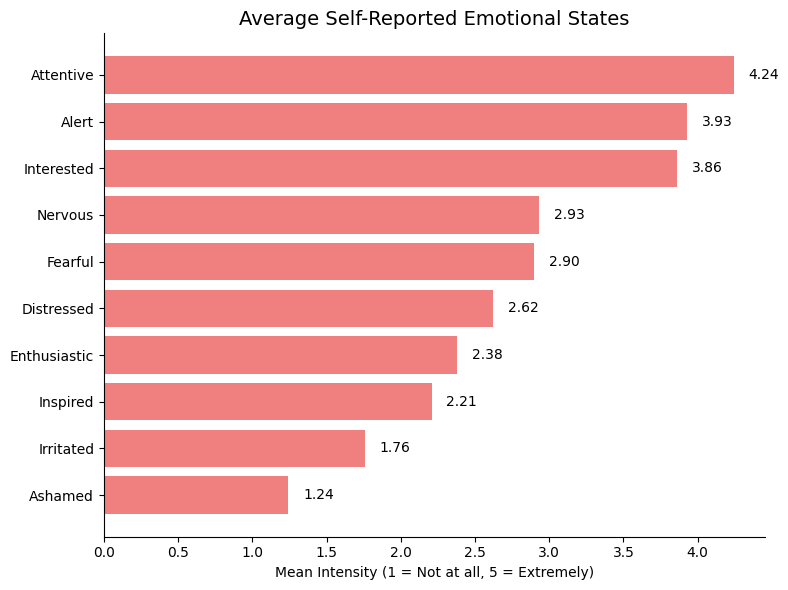

Session 12:45
  Distressed: Mean = 2.00, Std = 0.89
  Attentive: Mean = 4.67, Std = 0.52
  Ashamed: Mean = 1.00, Std = 0.00
  Enthusiastic: Mean = 2.50, Std = 1.52
  Irritated: Mean = 1.33, Std = 0.52
  Inspired: Mean = 2.50, Std = 1.76
  Nervous: Mean = 2.50, Std = 0.55
  Interested: Mean = 4.50, Std = 0.55
  Alert: Mean = 4.00, Std = 0.63
  Fearful: Mean = 2.33, Std = 0.52
Session 13:15
  Distressed: Mean = 2.17, Std = 0.75
  Attentive: Mean = 4.17, Std = 0.75
  Ashamed: Mean = 1.33, Std = 0.82
  Enthusiastic: Mean = 2.83, Std = 0.75
  Irritated: Mean = 2.00, Std = 1.10
  Inspired: Mean = 2.50, Std = 0.55
  Nervous: Mean = 3.00, Std = 0.89
  Interested: Mean = 3.67, Std = 1.51
  Alert: Mean = 4.00, Std = 0.89
  Fearful: Mean = 2.83, Std = 0.75
Session 14:00
  Distressed: Mean = 4.00, Std = 0.00
  Attentive: Mean = 4.33, Std = 0.82
  Ashamed: Mean = 1.83, Std = 0.75
  Enthusiastic: Mean = 2.17, Std = 0.75
  Irritated: Mean = 3.00, Std = 1.55
  Inspired: Mean = 2.17, Std = 0.75
  Nervo

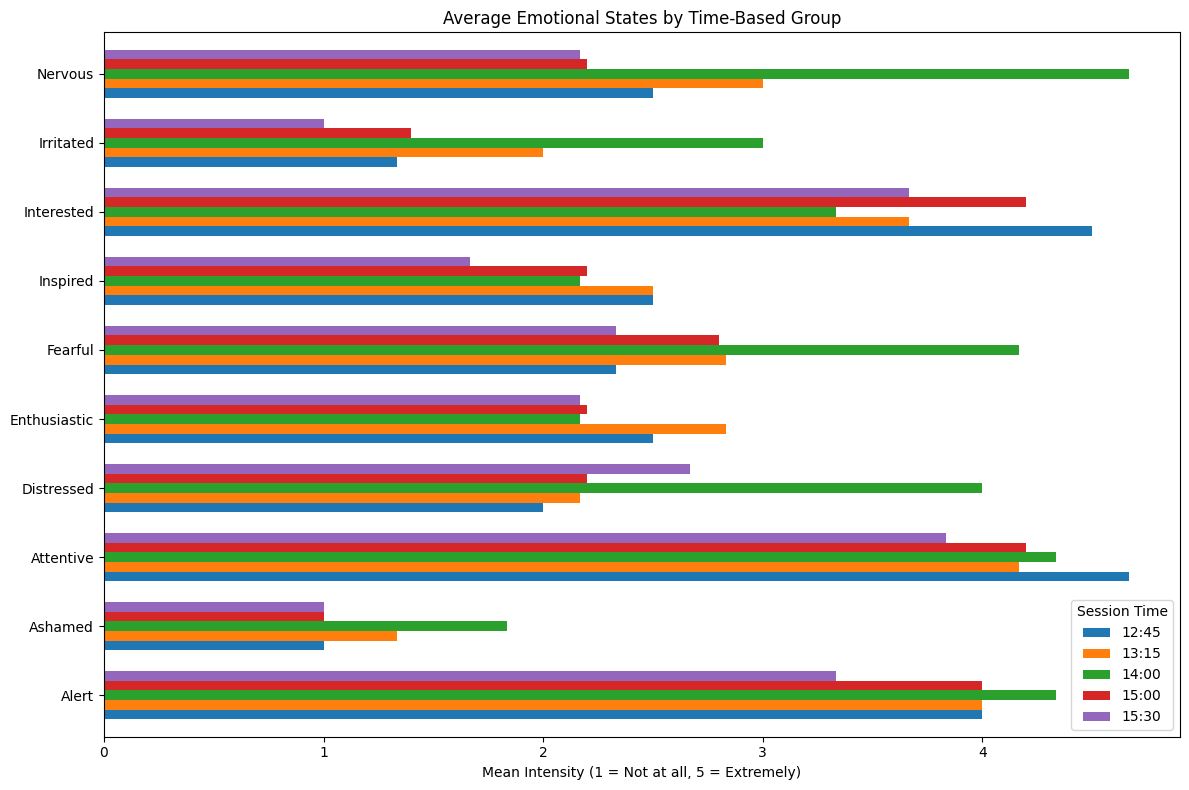

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# PLOT 5: Emotional States 
# French to English mapping
emotion_map = {
    "Angoissé(e)\xa0": "Distressed",
    "Attentif(ve)": "Attentive",
    "Honteux(se)": "Ashamed",
    "Enthousiaste": "Enthusiastic",
    "Irrité(e)": "Irritated",
    "Inspiré(e)": "Inspired",
    "Nerveux(se)": "Nervous",
    "Intéressé(e)": "Interested",
    "Alerte": "Alert",
    "Craintif(ve)": "Fearful"
}

df_emotions = df[list(emotion_map.keys())].rename(columns=emotion_map)
df_emotions = df_emotions.apply(pd.to_numeric, errors='coerce')

# mean scores
emotion_means = df_emotions.mean().sort_values()

# Plot 
plt.figure(figsize=(8, 6))
bars = plt.barh(emotion_means.index, emotion_means.values, color='lightcoral')

for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.1, bar.get_y() + bar.get_height() / 2,
             f"{width:.2f}", va='center', ha='left')
    
emotion_means = df_emotions.mean().sort_values()
emotion_stds = df_emotions.std()

print("Emotional States - Mean and Std Dev:")
for emotion in emotion_means.index:
    print(f"{emotion}: Mean = {emotion_means[emotion]:.2f}, Std = {emotion_stds[emotion]:.2f}")


plt.title("Average Self-Reported Emotional States", fontsize=14)
plt.xlabel("Mean Intensity (1 = Not at all, 5 = Extremely)")
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.tight_layout()
plt.show()


# PLOT 6: Emotional States by Session Time

df_clean['Startzeit'] = pd.to_datetime(df_clean['Startzeit'], errors='coerce')
df_clean['TimeGroup'] = df_clean['Startzeit'].dt.round('15min')

# Compute average emotional states per session group
grouped_emotions = []

for group_time, group_data in df_clean.groupby('TimeGroup'):
    emotions = group_data[list(emotion_map.keys())].rename(columns=emotion_map)
    emotions = emotions.apply(pd.to_numeric, errors='coerce')
    mean_emotions = emotions.mean()
    mean_emotions.name = group_time.strftime('%H:%M')
    grouped_emotions.append(mean_emotions)

# Convert to df
emotion_by_group = pd.DataFrame(grouped_emotions)
emotion_by_group = emotion_by_group.T.sort_index()

# Plot 
emotion_by_group.plot(kind='barh', figsize=(12, 8), width=0.7)

for group_time, group_data in df_clean.groupby('TimeGroup'):
    emotions = group_data[list(emotion_map.keys())].rename(columns=emotion_map)
    emotions = emotions.apply(pd.to_numeric, errors='coerce')
    means = emotions.mean()
    stds = emotions.std()
    print(f"Session {group_time.strftime('%H:%M')}")
    for col in means.index:
        print(f"  {col}: Mean = {means[col]:.2f}, Std = {stds[col]:.2f}")


plt.title("Average Emotional States by Time-Based Group")
plt.xlabel("Mean Intensity (1 = Not at all, 5 = Extremely)")
plt.legend(title="Session Time")
plt.tight_layout()
plt.show()
